In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
tpi = 2.0*pi
fpi = 4.0*pi
%matplotlib inline

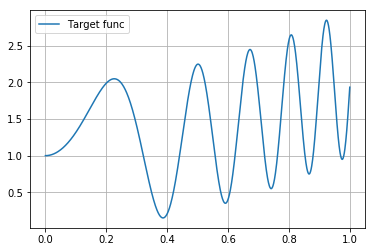

In [2]:
def ftarget(x):
    f = 1.0 + x**2 + 1.0*np.sin(tpi*5.0*x**2)
    return f
x= np.arange(0.0, 1.0, 0.001)
f = ftarget(x)

plt.figure()
plt.plot(x,f,label='Target func')
plt.grid()
plt.legend()
plt.show()

In [3]:
def xx2K(x1,x2):
    theta1 = 1.0e-3
    theta2 = 1.0e-3
    theta3 = 0.0
    theta4 = 1.0
    K = 0.0*np.outer(x1,x2)
    for i in range(len(x1)):
        K[i,:] = theta1*np.exp(-(x1[i] - x2[:])**2/theta2) + theta3*x1[i]*x2[:] + theta4
#    for i in range(len(x1)):
#        K[i,:] = np.exp(-np.abs(x1[i] - x2[:])/theta2)
    return K

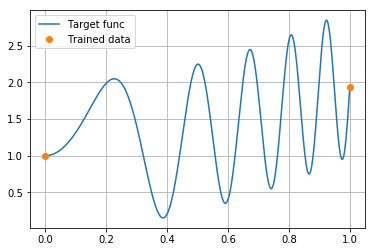

In [4]:
xtrain = np.zeros(2)
xtrain[0] = np.amin(x)
xtrain[1] = np.amax(x)
ytrain = ftarget(xtrain)
plt.figure()
plt.plot(x,f,label='Target func')
plt.plot(xtrain,ytrain,'o',label='Trained data')
plt.grid()
plt.legend()
plt.show()

$$
\left(k^*\right)^{T} K^{-1} y
$$
$$
\left(k^*\right)^{T} z,
\quad
Kz =y
$$
$$
K = L L^T,
\quad
L w = y,
\quad
L^T z = w.
$$

In [5]:
def xtrain2meanvariance_old(xtrain,ytrain,x):
    K = xx2K(xtrain,xtrain)
    Kinv = np.linalg.inv(K)
    plt.matshow(K)
    plt.matshow(Kinv)
    kast = xx2K(xtrain,x)
    kastast = xx2K(x,x)
    fmean = np.dot(kast.T,np.dot(Kinv,ytrain))
    fvariance = kastast - np.dot(kast.T, np.dot(Kinv,kast))
    fvariance = np.sqrt(np.diag(fvariance))
    return fmean, fvariance
def xtrain2meanvariance(xtrain,ytrain,x):
    eps = 1.0e-10
    K = xx2K(xtrain,xtrain) + eps*np.eye(len(xtrain))
#    eigs = np.linalg.eigvalsh(K)
#    print(eigs)
    L = np.linalg.cholesky(K)
    plt.matshow(K)
    plt.matshow(L)
    kast = xx2K(xtrain,x)
    kastast = xx2K(x,x)
    w = np.linalg.solve(L, ytrain)
    z = np.linalg.solve(L.T, w)
    fmean = np.dot(kast.T, z)
    W = np.linalg.solve(L, kast)
    Z = np.linalg.solve(L.T, W)
    fvariance = kastast - np.dot(kast.T, Z)
    fvariance = np.sqrt(np.diag(fvariance))
    return fmean, fvariance

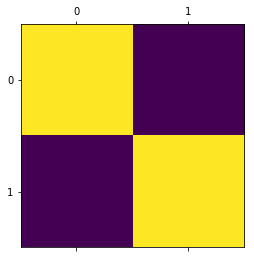

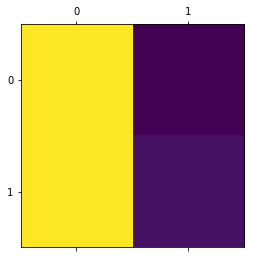

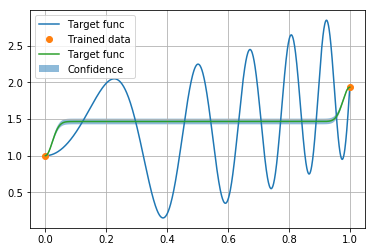

In [6]:
fmean, fvariance= xtrain2meanvariance(xtrain,ytrain,x)
plt.figure()
plt.plot(x,f,label='Target func')
plt.plot(xtrain,ytrain,'o',label='Trained data')
plt.plot(x,fmean,label='Target func')
plt.fill_between(x,fmean + fvariance, fmean - fvariance,label='Confidence',alpha = 0.5)
plt.grid()
plt.legend()
plt.show()

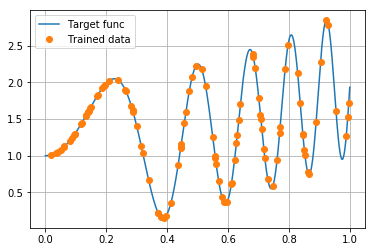

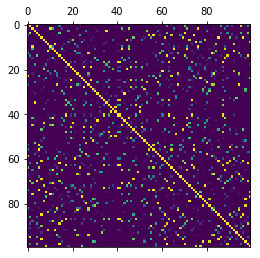

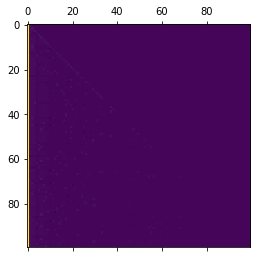

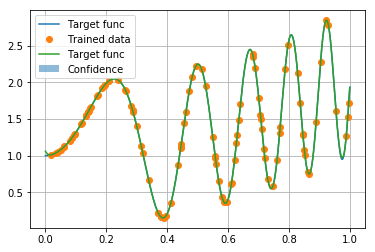

0.00014549223045806663


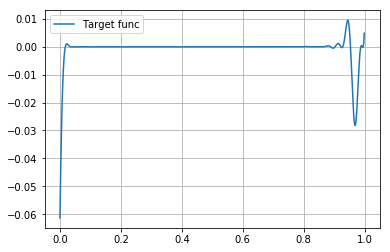

In [7]:
#np.random.seed(123)
xtrain = np.random.rand(100)*np.amax(x)
ytrain = ftarget(xtrain)
plt.figure()
plt.plot(x,f,label='Target func')
plt.plot(xtrain,ytrain,'o',label='Trained data')
plt.grid()
plt.legend()
plt.show()
fmean, fvariance= xtrain2meanvariance(xtrain,ytrain,x)
plt.figure()
plt.plot(x,f,label='Target func')
plt.plot(xtrain,ytrain,'o',label='Trained data')
plt.plot(x,fmean,label='Target func')
plt.fill_between(x,fmean + fvariance, fmean - fvariance,label='Confidence',alpha = 0.5)
plt.grid()
plt.legend()
plt.show()
print(np.sum(fvariance)/len(fvariance))
plt.figure()
plt.plot(x,f - fmean,label='Target func')
plt.grid()
plt.legend()
plt.show()